In [3648]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import pickle

Get and Read the data

In [3649]:
df = pd.read_csv('FraminghamDataset.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Attribute details

In [3650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Changing Attribute name and replacing null values with mean

In [3651]:
df.rename(columns={'male' : 'sex'}  , inplace=True)
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Deep copy of data

In [3652]:
df1 = df.copy(deep=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1[df1.columns] = imputer.fit_transform(df1[df1.columns])
df2 = df1.copy(deep=True)

In [3653]:
df1.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

DATA ANALYSIS

Chart Functions

In [3654]:
def draw_crosstab(x, dff):
    pd.crosstab(dff[x]  ,dff.TenYearCHD).plot(kind='bar')
    plt.title(f'Death Event as per {x}')
    plt.xlabel(x)
    plt.ylabel('Death')
    plt.show()

In [3655]:
def mortality_rate(x, dff):
    for j in dff[x].unique():
        if not math.isnan(j):
            print("Percentage of people who died and had ",x,"= ",j," were ",
                dff["TenYearCHD"][dff[x] == j].value_counts(normalize = True)[1]*100)

EDUCATION ->
1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

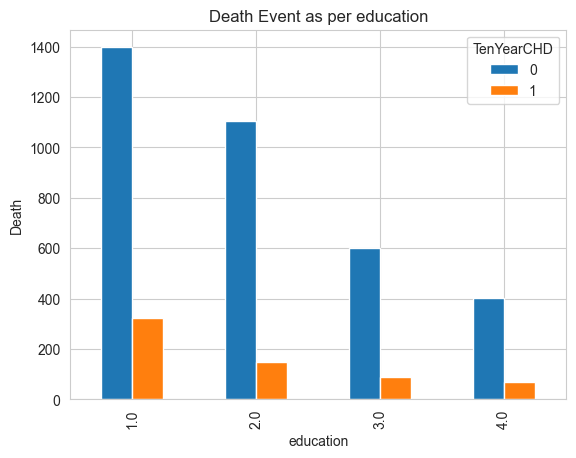

Percentage of people who died and had  education =  4.0  were  14.799154334038056
Percentage of people who died and had  education =  2.0  were  11.731843575418994
Percentage of people who died and had  education =  1.0  were  18.77906976744186
Percentage of people who died and had  education =  3.0  were  12.809315866084425


In [3656]:
draw_crosstab("education", df)
mortality_rate("education", df)

Smoking

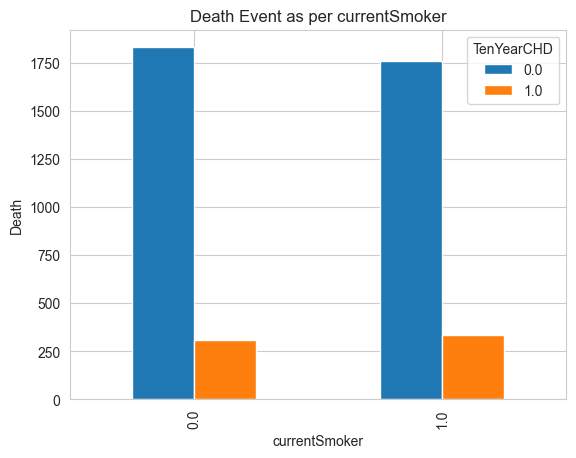

Percentage of people who died and had  currentSmoker =  0.0  were  14.505597014925373
Percentage of people who died and had  currentSmoker =  1.0  were  15.902578796561603


In [3657]:
draw_crosstab("currentSmoker", df1)
mortality_rate("currentSmoker", df1)

Gender

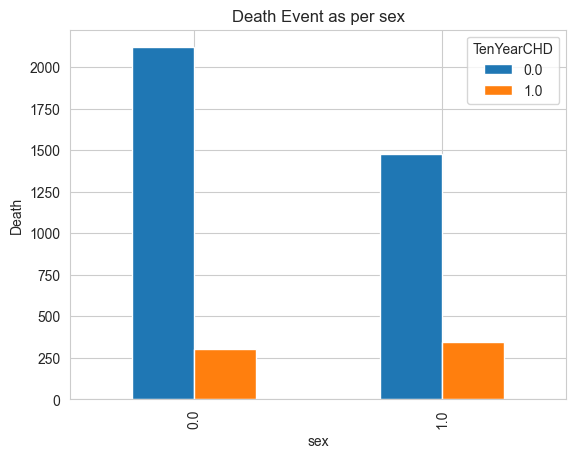

Percentage of people who died and had  sex =  1.0  were  18.8565145684442
Percentage of people who died and had  sex =  0.0  were  12.443158329888384


In [3658]:
draw_crosstab("sex",df1)
mortality_rate("sex", df1)

Systolic Blood Pressure

In [3659]:
for i in range(len(df1.sysBP)):
    if df1.loc[i, 'sysBP'] <= 120:
        df1.loc[i, 'sysBP']=0

    elif 120 < df1.loc[i, 'sysBP'] <= 140:
        df1.loc[i, 'sysBP']=1

    elif df1.loc[i, 'sysBP'] > 140:
        df1.loc[i, 'sysBP']=2

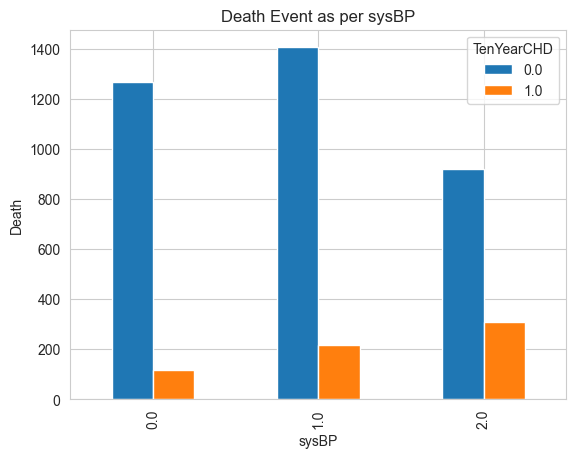

Percentage of people who died and had  sysBP =  0.0  were  8.585858585858585
Percentage of people who died and had  sysBP =  1.0  were  13.316892725030826
Percentage of people who died and had  sysBP =  2.0  were  25.121951219512194


In [3660]:
draw_crosstab("sysBP", df1)
mortality_rate("sysBP", df1)

Diastolic Blood Pressure

In [3661]:
for i in range(len(df1.diaBP)):
    if df1.loc[i, 'diaBP'] <= 80:
        df1.loc[i, 'diaBP']=0

    elif 80 < df1.loc[i, 'diaBP'] <= 90:
        df1.loc[i, 'diaBP']=1

    elif df1.loc[i, 'diaBP'] > 90:
        df1.loc[i, 'diaBP']=2

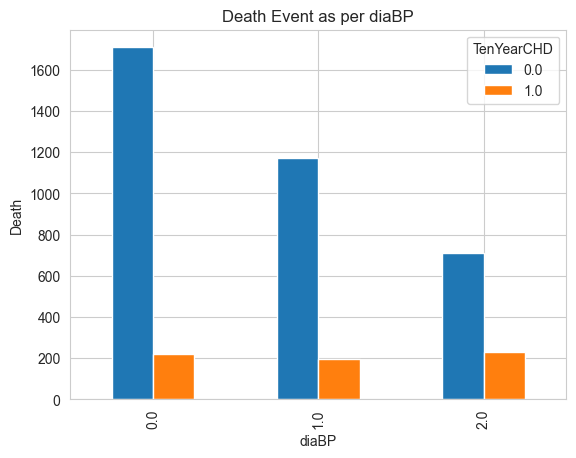

Percentage of people who died and had  diaBP =  0.0  were  11.307053941908714
Percentage of people who died and had  diaBP =  1.0  were  14.243973703433163
Percentage of people who died and had  diaBP =  2.0  were  24.54835281615303


In [3662]:
draw_crosstab("diaBP", df1)
mortality_rate("diaBP", df1)

Prevalent Stroke

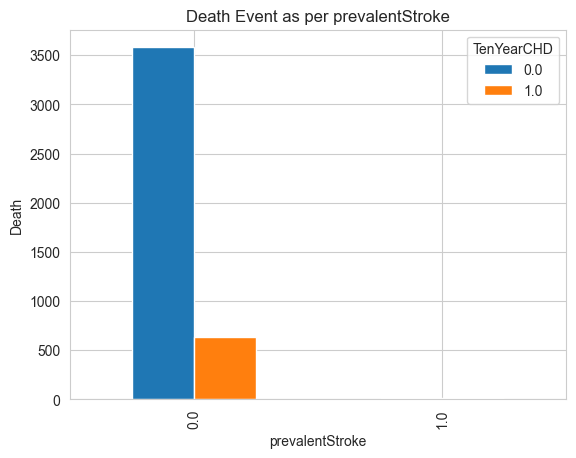

Percentage of people who died and had  prevalentStroke =  0.0  were  15.02492285782103
Percentage of people who died and had  prevalentStroke =  1.0  were  44.0


In [3663]:
draw_crosstab("prevalentStroke", df1)
mortality_rate("prevalentStroke", df1)

Diabetes

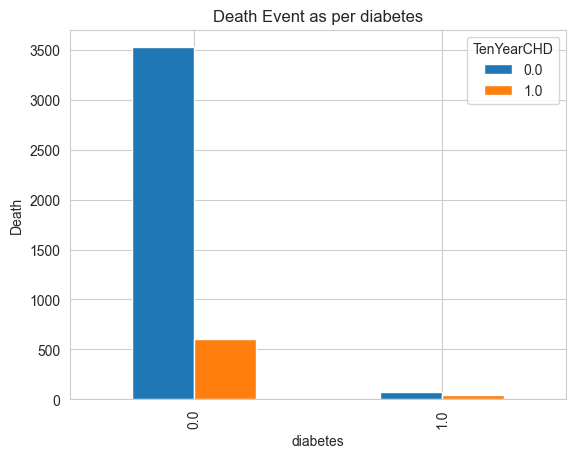

Percentage of people who died and had  diabetes =  0.0  were  14.628239283119399
Percentage of people who died and had  diabetes =  1.0  were  36.69724770642202


In [3664]:
draw_crosstab("diabetes", df1)
mortality_rate("diabetes", df1)

Age

In [3665]:
g_20 = list()
g_40 = list()
g_60 = list()
greater60 = list()
for i in df1.age:
    if i <= 20:
        g_20.append(1)
        g_40.append(0)
        g_60.append(0)
        greater60.append(0)

    elif 20 < i <= 40:
        g_20.append(0)
        g_40.append(1)
        g_60.append(0)
        greater60.append(0)

    elif 40 < i <= 60:
        g_20.append(0)
        g_40.append(0)
        g_60.append(1)
        greater60.append(0)

    elif i > 60:
        g_20.append(0)
        g_40.append(0)
        g_60.append(0)
        greater60.append(1)

df1['age_till_20'] = g_20
df1['age_bet_20_40'] = g_40
df1['age_bet_40_60'] = g_60
df1['age_gret_60'] = greater60

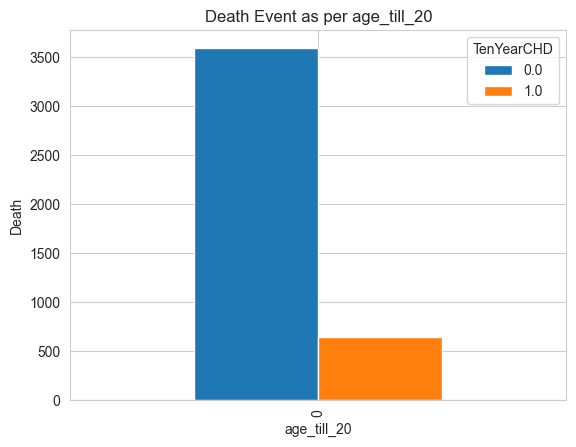

Percentage of people who died and had  age_till_20 =  0  were  15.19584709768759


In [3666]:
draw_crosstab("age_till_20", df1)
mortality_rate("age_till_20", df1)

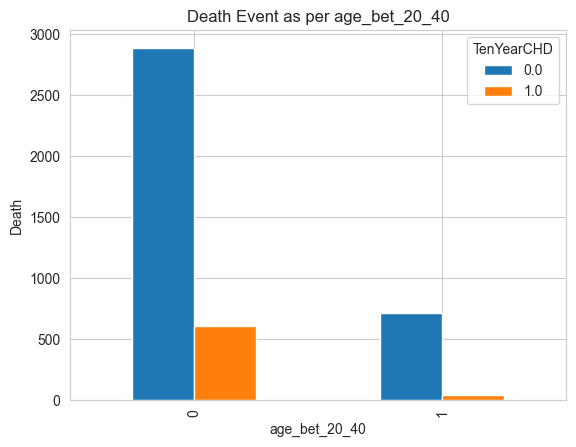

Percentage of people who died and had  age_bet_20_40 =  1  were  5.093833780160858
Percentage of people who died and had  age_bet_20_40 =  0  were  17.353951890034363


In [3667]:
draw_crosstab("age_bet_20_40", df1)
mortality_rate("age_bet_20_40", df1)

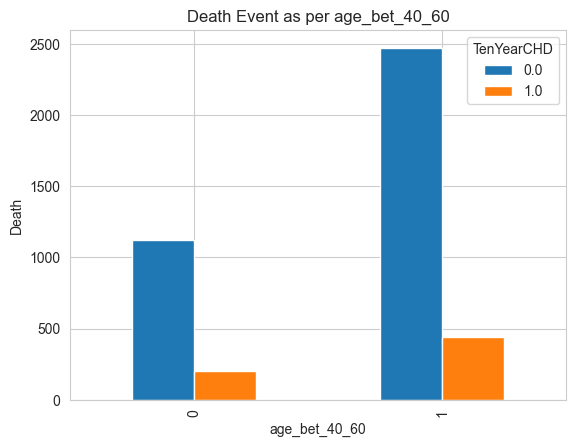

Percentage of people who died and had  age_bet_40_60 =  0  were  15.320754716981133
Percentage of people who died and had  age_bet_40_60 =  1  were  15.139031925849638


In [3668]:
draw_crosstab("age_bet_40_60", df1)
mortality_rate("age_bet_40_60", df1)

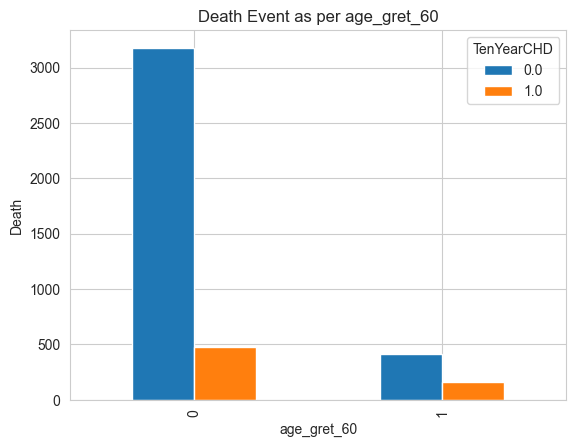

Percentage of people who died and had  age_gret_60 =  0  were  13.09100847226018
Percentage of people who died and had  age_gret_60 =  1  were  28.497409326424872


In [3669]:
draw_crosstab("age_gret_60", df1)
mortality_rate("age_gret_60", df1)

Systolic blood pressure and Cigarettes per day

In [3670]:
for i in range(len(df1.cigsPerDay)):
    if df1.loc[i, 'cigsPerDay'] <= 20:
        df1.loc[i, 'cigsPerDay']=0

    elif df1.loc[i, 'cigsPerDay'] > 20:
        df1.loc[i, 'cigsPerDay']=1
df1_high_sysBP = df1.loc[df1['sysBP'] == 2]

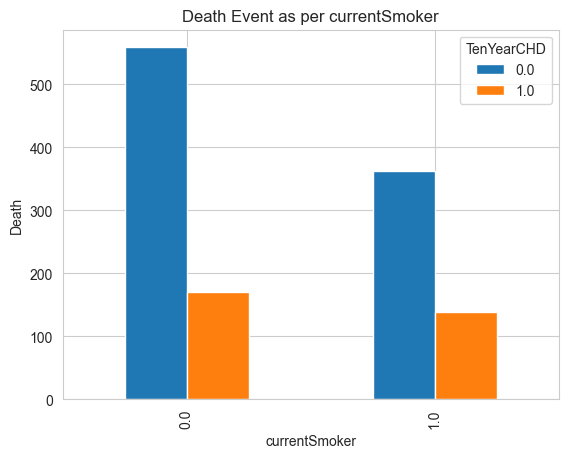

Percentage of people who died and had  currentSmoker =  1.0  were  27.744510978043913
Percentage of people who died and had  currentSmoker =  0.0  were  23.319615912208505


In [3671]:
draw_crosstab("currentSmoker", df1_high_sysBP)
mortality_rate("currentSmoker", df1_high_sysBP)

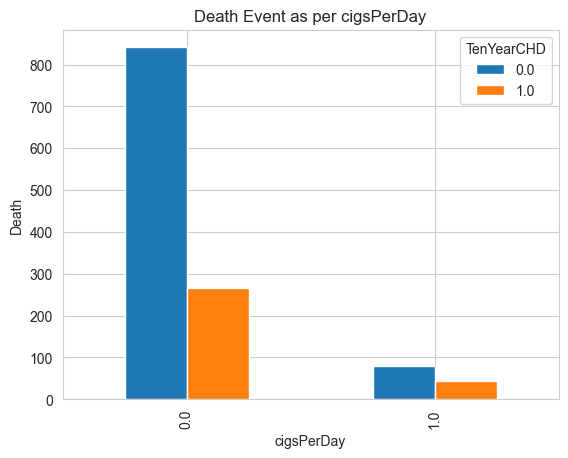

Percentage of people who died and had  cigsPerDay =  1.0  were  34.959349593495936
Percentage of people who died and had  cigsPerDay =  0.0  were  24.028906955736222


In [3672]:
draw_crosstab("cigsPerDay", df1_high_sysBP)
mortality_rate("cigsPerDay", df1_high_sysBP)

Data Preparation

In [3673]:
df2.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [3674]:
'''for i in range(len(df2.cigsPerDay)):
    if df2.loc[i, 'cigsPerDay'] <= 20:
        df2.loc[i, 'cigsPerDay']=0

    elif df2.loc[i, 'cigsPerDay'] > 20:
        df2.loc[i, 'cigsPerDay']=1
for i in range(len(df2.diaBP)):
    if df2.loc[i, 'diaBP'] <= 80:
        df2.loc[i, 'diaBP']=0

    elif 80 < df2.loc[i, 'diaBP'] <= 90:
        df2.loc[i, 'diaBP']=1

    elif df2.loc[i, 'diaBP'] > 90:
        df2.loc[i, 'diaBP']=2
for i in range(len(df2.sysBP)):
    if df2.loc[i, 'sysBP'] <= 120:
        df2.loc[i, 'sysBP']=0

    elif 120 < df2.loc[i, 'sysBP'] <= 140:
        df2.loc[i, 'sysBP']=1

    elif df2.loc[i, 'sysBP'] > 140:
        df2.loc[i, 'sysBP']=2
df2.head()'''

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,0.0,0.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,1.0,1.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,245.0,1.0,0.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,225.0,2.0,2.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,285.0,1.0,1.0,23.10,85.0,85.0,0.0


In [3675]:
y = df2.TenYearCHD
y.value_counts()

0.0    3594
1.0     644
Name: TenYearCHD, dtype: int64

In [3676]:
X = df2.drop(columns=["TenYearCHD"])
X.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,0.0,0.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,1.0,1.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,245.0,1.0,0.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,225.0,2.0,2.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,285.0,1.0,1.0,23.10,85.0,85.0


Splitting the train test data

In [3677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=69)

Balancing the dataset and Standard Scalar- Normalization

In [3678]:
X_train.shape
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=3)
# X_train, y_train = over_sampler.fit_resample(X_train, y_train)
X_test, y_test = over_sampler.fit_resample(X_test, y_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3679]:
X_train.shape

(3178, 15)

Training the model

In [3680]:
w = {0:10, 1:90}
class_weight=w
logr = LogisticRegression(random_state=42, class_weight=w, max_iter=10000, verbose=10, warm_start=True)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

 U =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88114D+04    |proj g|=  1.36986D+04


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
 This problem is unconstrained.


 1 --f1, f2 at start point  -7.8236D+08  7.8236D+08
Distance to the stationary point =   1.0000D+00
Cauchy X =  
      5.1529D+03  1.3699D+04 -3.1835D+03 -2.1566D+02  2.0468D+03  5.3842D+03
      3.9337D+03  1.0384D+04  5.7785D+03  5.3021D+03  1.0875D+04  8.1972D+03
      5.1382D+03  1.8370D+03  7.5187D+03  8.2600D+03

---------------- exit CAUCHY----------------------

          16  variables are free at GCP            1
 LINE SEARCH           0  times; norm of step =    1.0000000000000000     

At iterate    1    f=  4.48047D+04    |proj g|=  7.28835D+03

 X =  1.8422D-01  4.8975D-01 -1.1382D-01 -7.7102D-03  7.3175D-02  1.9249D-01
      1.4064D-01  3.7125D-01  2.0659D-01  1.8956D-01  3.8879D-01  2.9306D-01
      1.8370D-01  6.5676D-02  2.6881D-01  2.9531D-01

 G = -1.8246D+03  1.1660D+03 -1.1468D+03 -3.7405D+03 -1.5476D+03  2.4872D+03
      7.0165D+02  7.2883D+03  2.1642D+03  1.9276D+03  6.8703D+03  6.8642D+03
      4.1245D+03  2.2278D+03  2.4475D+03  1.0040D+03


ITERATION     2

--

Testing and evaluating the model

In [3681]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.45      0.55       899
         1.0       0.60      0.84      0.70       899

    accuracy                           0.64      1798
   macro avg       0.67      0.64      0.63      1798
weighted avg       0.67      0.64      0.63      1798



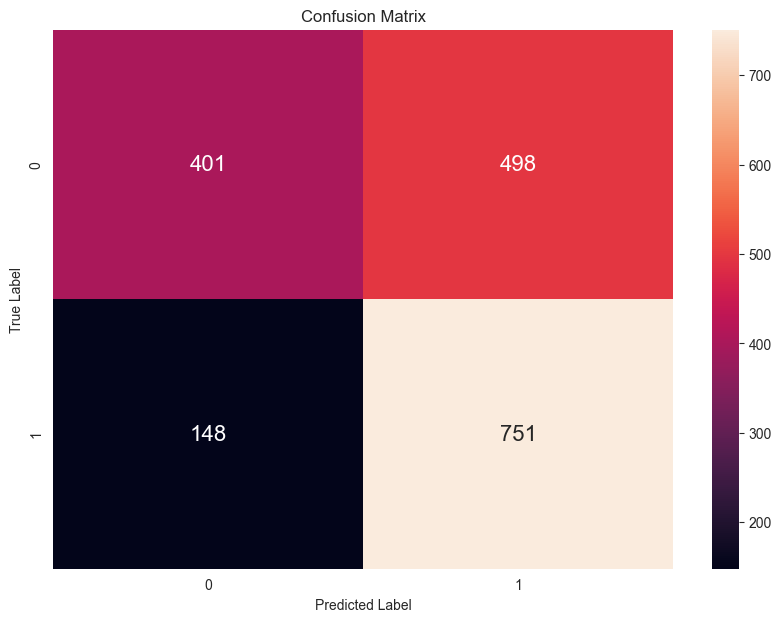

In [3682]:
def plot_confusion_matrix(y_testing, y_predicted):
    conf_mat = pd.DataFrame(confusion_matrix(y_testing, y_predicted))
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [3683]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)

Accuracy: 0.641
[[401 498]
 [148 751]]
0.7304189435336976


In [3684]:
precision_score(y_test, y_pred)

0.6012810248198559

In [3685]:
recall_score(y_test, y_pred)

0.8353726362625139

In [3686]:
f1_score(y_test, y_pred)

0.6992551210428304

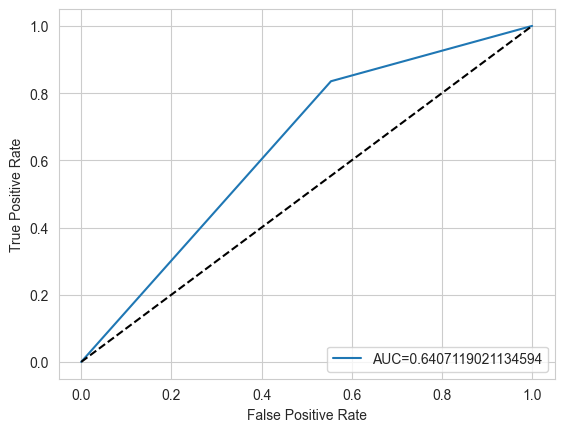

In [3687]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [3688]:
pickle.dump(logr, open('model.pkl','wb'))